In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.3.0


## Focal loss

In [2]:
from focal_loss import FocalLoss

In [3]:
# focal loss paramaters
alpha=0.99
gamma=1
fl = FocalLoss(alpha=alpha, gamma=gamma)

In [4]:
y_true = np.asarray([0., 1.])
y_pred = np.asarray([0.6, 0.4])
# Using 'auto'/'sum_over_batch_size' reduction type.

print(f"fl: {fl(y_true, y_pred).numpy()}")

fl: 0.2721383571624756


In [5]:
alpha = 1
gamma_candidates = [0, 0.5, 1, 2, 5]
gamma = 0
fl_0 = FocalLoss(alpha=alpha, gamma=0)
fl_0_5 = FocalLoss(alpha=alpha, gamma=0.5)
fl_1 = FocalLoss(alpha=alpha, gamma=1)
fl_2 = FocalLoss(alpha=alpha, gamma=2)
fl_5 = FocalLoss(alpha=alpha, gamma=5)

### class 0 is positive

In [6]:
# class 0 label, class 1 label
y_true = np.asarray([0., 1.])
p = np.linspace(0.00000001, 0.999, 1000)
num_samples = p.shape[0]
focal_loss = np.zeros((num_samples, 5))
for i, _p in enumerate(p):
    y_pred = np.asarray([_p, 1-_p])
    focal_loss[i, 0] = fl_0(y_true, y_pred)
    focal_loss[i, 1] = fl_0_5(y_true, y_pred)
    focal_loss[i, 2] = fl_1(y_true, y_pred)
    focal_loss[i, 3] = fl_2(y_true, y_pred)
    focal_loss[i, 4] = fl_5(y_true, y_pred)

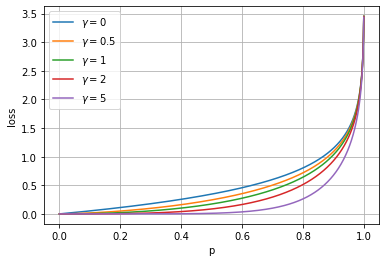

In [7]:
plt.plot(p, focal_loss[:,0], label="$\gamma=0$")
plt.plot(p, focal_loss[:,1], label="$\gamma=0.5$")
plt.plot(p, focal_loss[:,2], label="$\gamma=1$")
plt.plot(p, focal_loss[:,3], label="$\gamma=2$")
plt.plot(p, focal_loss[:,4], label="$\gamma=5$")
plt.xlabel("p")
plt.ylabel("loss")
plt.legend()
plt.grid()

### class 1 is positive

In [8]:
# class 0 label, class 1 label
y_true = np.asarray([1., 0.])
p = np.linspace(0.00000001, 0.999, 1000)
num_samples = p.shape[0]
focal_loss = np.zeros((num_samples, 5))
for i, _p in enumerate(p):
    y_pred = np.asarray([_p, 1-_p])
    focal_loss[i, 0] = fl_0(y_true, y_pred)
    focal_loss[i, 1] = fl_0_5(y_true, y_pred)
    focal_loss[i, 2] = fl_1(y_true, y_pred)
    focal_loss[i, 3] = fl_2(y_true, y_pred)
    focal_loss[i, 4] = fl_5(y_true, y_pred)

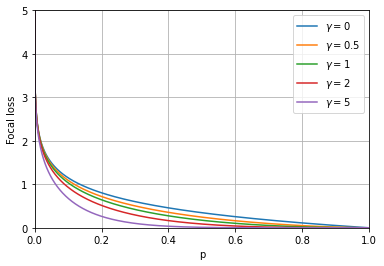

In [14]:
plt.plot(p, focal_loss[:,0], label="$\gamma=0$")
plt.plot(p, focal_loss[:,1], label="$\gamma=0.5$")
plt.plot(p, focal_loss[:,2], label="$\gamma=1$")
plt.plot(p, focal_loss[:,3], label="$\gamma=2$")
plt.plot(p, focal_loss[:,4], label="$\gamma=5$")
plt.xlabel("p")
plt.ylabel("Focal loss")
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.legend()
plt.grid()